In [1]:
import pandas as pd
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from subprocess import check_output
import matplotlib as mpl
import csv
import matplotlib.pyplot as plt

import operator
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer

In [3]:
twitter = pd.read_csv("/Users/xuetan/Desktop/Ivey_Business Analytics/Social Media/data/Novartis Tweets - Scraped October 3, 2018.csv",encoding="ISO-8859-1")

In [4]:
text = twitter["text"]
text.head()

0    We are proud to join forces with #GARDP to acc...
1    #NovartisNews: Boston Pharmaceuticals has lice...
2    @Joydeep38191902 We saw your tweet. Please pro...
3    @Guiazevedos We saw your tweet. Please provide...
4    Weâre finding clues that may aid in better r...
Name: text, dtype: object

In [7]:
import sys  


In [8]:
for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    twitter.set_value(i, 'Sentiment',sentiment)
    if sentiment <0:
        SentimentClass = 'Negative'
        twitter.set_value(i, 'SentimentClass', SentimentClass )
    elif sentiment >0:
        SentimentClass = 'Positive'
        twitter.set_value(i, 'SentimentClass', SentimentClass )
    else:
        SentimentClass = 'Neutral'
        twitter.set_value(i, 'SentimentClass', SentimentClass )

In [9]:
twitter.to_csv("/Users/xuetan/Desktop/Ivey_Business Analytics/Social Media/data/twitter_senti.csv")


In [11]:
####wordcloud
mask = imread("/Users/xuetan/Desktop/Ivey_Business Analytics/Social Media/data/twitterlogo_1x.png")
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white",stopwords = stopwords, mask = mask)
wordcloud.generate(str(twitter["text"]))

In [12]:
plt.imshow(wordcloud)

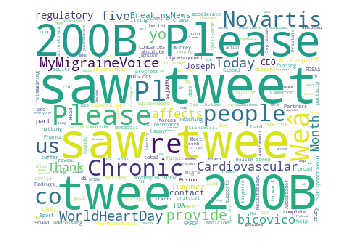

In [13]:
plt.axis("off")
plt.savefig("/Users/xuetan/Desktop/Ivey_Business Analytics/Social Media/data/wordcloud.png", dpi=300)
plt.show()